In [ ]:
#@title Initial Setup

import os, sys
from IPython.utils import io

with io.capture_output() as cap:
  !apt install tree
  !pip install geopandas
  !pip install netCDF4
  # https://github.com/SciTools/cartopy/issues/1490
  !apt-get -qq install python-cartopy python3-cartopy
  !pip uninstall -y shapely
  !pip install --no-binary shapely shapely==1.7.0 --force
  !pip install --no-binary cartopy cartopy==0.18.0
  !pip install git+https://github.com/tkrajina/srtm.py

%cd /content/drive/My Drive/Posgrado/Geophysics/Colab/ML/test

# https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/descarga-mgn-marco-geoestadistico-nacional/

!wget -nc 'https://geoportal.dane.gov.co/descargas/mgn_2020/MGN2020_DPTO_POLITICO.rar'
!wget -nc 'https://geoportal.dane.gov.co/descargas/mgn_2020/MGN2020_MPIO_POLITICO.rar'

!mkdir 'MGN2020'
!unrar -o- x 'MGN2020_DPTO_POLITICO.rar' 'MGN2020'
!unrar -o- x 'MGN2020_MPIO_POLITICO.rar' 'MGN2020'

!tree -a MGN*/

with open('installs_Shapefiles.txt', 'w') as f:
    f.write(cap.stdout)
%ls -altrh

sys.path.append("/usr/local/lib/python3.6/site-packages")
from IPython.display import set_matplotlib_formats
from IPython.display import display, display_svg
from IPython.display import Markdown, Math, Latex
from IPython.display import Javascript, IFrame, HTML

from io import StringIO
import requests

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
set_matplotlib_formats('pdf', 'svg')
from matplotlib import style
#style.use('classic')

# https://github.com/tkrajina/srtm.py
import srtm
elevation_data = srtm.get_data()
get_elevation_vectorized = np.vectorize(
    elevation_data.get_elevation,
    otypes=[float]
    )

import fiona
import geopandas as gpd
from shapely.geometry import Point, MultiPolygon
from shapely.geometry.polygon import Polygon
from shapely.geometry import shape
from shapely.geometry import mapping
from shapely.ops import unary_union
from netCDF4 import Dataset as netcdf_dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# https://github.com/SciTools/cartopy/issues/1120#issuecomment-424418760
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

# Avoids scroll-in-the-scroll in the entire Notebook
# https://stackoverflow.com/a/66891328
def resize_colab_cell():
  display(Javascript(
      'google.colab.output.setIframeHeight(0, true, {maxHeight: 6000})'
      ))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

def dLatex(self):
  return display(Latex(self))

def dMarkdown(self):
  return display(Markdown(self))

/content/drive/My Drive/Posgrado/Geophysics/Colab/ML/test
File ‘MGN2020_DPTO_POLITICO.rar’ already there; not retrieving.

File ‘MGN2020_MPIO_POLITICO.rar’ already there; not retrieving.

mkdir: cannot create directory ‘MGN2020’: File exists

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from MGN2020_DPTO_POLITICO.rar

No files to extract

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from MGN2020_MPIO_POLITICO.rar

No files to extract
MGN2020/
├── Colombia.cpg
├── Colombia.dbf
├── Colombia.shp
├── Colombia.shx
├── MGN_DPTO_POLITICO.CPG
├── MGN_DPTO_POLITICO.dbf
├── MGN_DPTO_POLITICO.prj
├── MGN_DPTO_POLITICO.sbn
├── MGN_DPTO_POLITICO.sbx
├── MGN_DPTO_POLITICO.shp
├── MGN_DPTO_POLITICO.shp.xml
├── MGN_DPTO_POLITICO.shx
├── MGN_MPIO_POLITICO.CPG
├── MGN_MPIO_POLITICO.dbf
├── MGN_MPIO_POLITICO.prj
├── MGN_MPIO_POLITICO.sbn
├── MGN_MPIO_POLITICO.sbx
├── MGN_MPIO_POLITICO.shp
├── MGN_MPIO_POLITICO.shp.xml
├── MGN_MPIO_POLITI

In [ ]:
#@title Natural Earth `admin_0_countries, cultural, 10m`

# https://scitools.org.uk/cartopy/docs/v0.15/tutorials/using_the_shapereader.html

admin_0 = gpd.read_file(
    shapereader.natural_earth(
        resolution='10m',
        category='cultural',
        name='admin_0_countries'
    ),
    encoding='UTF8'
    )
display(admin_0)

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,...,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,Indonesia,IDN,Indonesia,None,Indo.,INDO,Republic of Indonesia,None,Indonesia,None,None,Indonesia,None,6,6,6,11,270625568.0,17,2019,1119190,2019,...,Indonesien,Endonezya,Індонезія,انڈونیشیا,Indonesia,印度尼西亚,印度尼西亞,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,Malaysia,MYS,Malaysia,None,Malay.,MY,Malaysia,None,Malaysia,None,None,Malaysia,None,2,4,3,6,31949777.0,15,2019,364681,2019,...,Malaysia,Malezya,Малайзія,ملائیشیا,Malaysia,马来西亚,馬來西亞,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,0,Chile,CHL,0,Chile,CHL,0,Chile,Chile,CHL,Chile,None,Chile,CL,Republic of Chile,None,Chile,None,None,Chile,None,5,1,5,9,18952038.0,14,2019,282318,2019,...,Chile,Şili,Чилі,چلی,Chile,智利,智利,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,Bolivia,BOL,Bolivia,None,Bolivia,BO,Plurinational State of Bolivia,None,Bolivia,None,None,Bolivia,None,1,5,2,3,11513100.0,14,2019,40895,2019,...,Bolivia,Bolivya,Болівія,بولیویا,Bolivia,玻利维亚,玻利維亞,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,0,Peru,PER,0,Peru,PER,0,Peru,Peru,PER,Peru,None,Peru,PE,Republic of Peru,None,Peru,None,None,Peru,None,4,4,4,11,32510453.0,15,2019,226848,2019,...,Peru,Peru,Перу,پیرو,Peru,秘鲁,秘魯,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Admin-0 country,0,4,China,CH1,1,2,Country,Macao S.A.R,MAC,0,Macao S.A.R,MAC,0,Macao S.A.R,MAC,0,Macao,Macao,MAC,Macao,None,Mac.,MO,"Macao Special Administrative Region, PRC",None,Macau,China,None,"Macao SAR, China",None,4,4,4,3,640445.0,11,2019,53859,2019,...,Macao,Makao,Аоминь,مکاؤ,Ma Cao,澳门,澳門,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULT

<IPython.core.display.Javascript object>

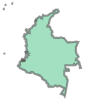

In [ ]:
#@title Natural Earth Colombia

naCOL = admin_0.loc[admin_0.ADM0_A3=='COL']
naCOL_poly = naCOL.geometry.values[0]
display(naCOL_poly)

<IPython.core.display.Javascript object>

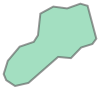

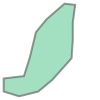

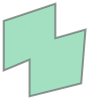

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


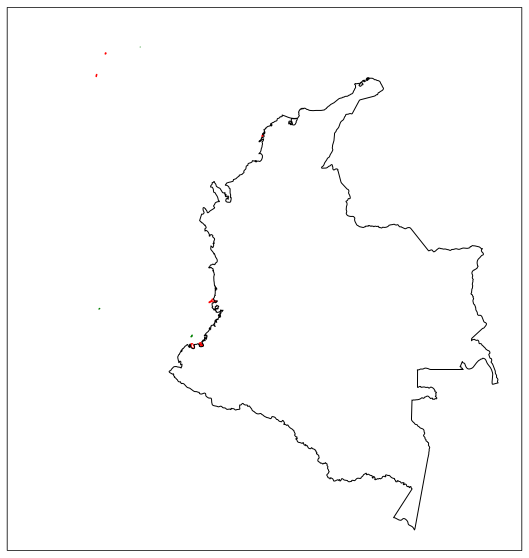

CPU times: user 1.93 s, sys: 29.3 ms, total: 1.95 s
Wall time: 2.19 s


In [ ]:
#@title Natural Earth Colombia islands and select

%%time

mask = np.array([
  False, False, False, False, False, False, False, True, True, False, True
  ])

islands = list(np.array(naCOL_poly)[mask])
for i in islands:
  display(i)

# https://scitools.org.uk/cartopy/docs/v0.16/tutorials/understanding_transform.html
fig, ax = plt.subplots(
    figsize=(10,)*2,
    subplot_kw={
        'projection': ccrs.Mercator(
            # GRS80 ellipsoid
            globe=ccrs.Globe(ellipse='GRS80')
            )}
    )
ax.set_extent([-85,-66,-5,15])
ax.coastlines(
    resolution='10m',
    color='w'
    )
ax.add_geometries(
    np.array(naCOL_poly)[~mask][1:],
    crs=ccrs.PlateCarree(),
    facecolor='none',
    edgecolor='r',
    zorder=1
    )
ax.add_geometries(
    np.array(naCOL_poly)[mask],
    crs=ccrs.PlateCarree(),
    facecolor='none',
    edgecolor='g',
    zorder=2
    )
ax.add_geometries(
    [np.array(naCOL_poly)[0]],
    crs=ccrs.PlateCarree(),
    facecolor='none',
    edgecolor='k',
    zorder=3
    )
plt.show()

In [ ]:
#@title Dane `DPTO_CCDGO`
%%time
DPTO_POLITICO = gpd.read_file('MGN2020/MGN_DPTO_POLITICO.shp')
display(DPTO_POLITICO.sort_values('DPTO_CCDGO'))

<IPython.core.display.Javascript object>

,DPTO_CCDGO,DPTO_CNMBR,DPTO_NANO_,DPTO_CACTO,DPTO_NANO,SHAPE_AREA,SHAPE_LEN,geometry
13,05,ANTIOQUIA,1886,Constitucion Politica de 1886,2020,5.134915,21.443760,"POLYGON ((-76.41355 8.87383, -76.40465 8.85195..."
32,08,ATLÁNTICO,1910,Ley 21 de 1910,2020,0.273930,2.540635,"POLYGON ((-74.84946 11.09778, -74.84938 11.097..."
27,11,"BOGOTÁ, D.C.",1538,Constitucion Politica de 1886,2020,0.132208,3.760453,"POLYGON ((-74.07419 4.83655, -74.07401 4.83647..."
17,13,BOLÍVAR,1886,Constitucion Politica de 1886,2020,2.195576,16.235823,"MULTIPOLYGON (((-75.25555 10.79960, -75.25546 ..."
24,15,BOYACÁ,1886,Constitucion Politica de 1886,2020,1.888391,15.906491,"POLYGON ((-72.17368 7.05308, -72.17277 7.05224..."
10,17,CALDAS,1905,11 de Abril de 1905,2020,0.605498,6.655844,"POLYGON ((-74.67154 5.77147, -74.67054 5.76896..."
0,18,CAQUETÁ,1981,Ley 78 del 29 de Diciembre de 1981,2020,7.318485,21.384287,"POLYGON ((-74.89423 2.95852, -74.89410 2.95852..."
1,19,CAUCA,1857,15 de junio de 1857,2020,2.534419,13.950263,"POLYGON ((-76.45922 3.32872, -76.45878 3.32870..."
18,20,CESAR,1967,Ley 25 21 de junio de 1967,2020,1.857960,12.611247,"POLYGON ((-73.45374 10.86767, -73.45358 10.867..."
16,23,CÓRDOBA,1951,Ley 9 del 18 de Diciembre de 1951,2020,2.057533,9.691516,"POLYGON ((-75.91797 9.44406, -75.91791 9.44348..."


CPU times: user 10.6 s, sys: 84.2 ms, total: 10.7 s
Wall time: 11.8 s


In [ ]:
#@title Maps of the Departments of Colombia

%%time
departaments_poly = DPTO_POLITICO['geometry'].to_list()
for poly in departaments_poly:
  display(poly)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#@title Merge Maps of Departaments
#@markdown This might take several minutes.

%%time

# https://gis.stackexchange.com/a/52708
# https://stackoverflow.com/a/61109050

# Merge Shapefile Polygons
Polygons = departaments_poly+islands
union = unary_union([shape(s.__geo_interface__) for s in Polygons])
areasdf=pd.DataFrame(
    [[poly.area,poly] for poly in union],
    columns=['Area','geometry']
 ).sort_values(
     ['Area'],
     ascending=False
     ).reset_index(drop=True)
areasdf['geometry'][0] = Polygon(list(
    areasdf['geometry'][0].exterior.coords
    ))
display(areasdf)
new_union = MultiPolygon(areasdf['geometry'].to_list())
display(new_union)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#@title Maps Colombia and islands

for i, poly in enumerate(new_union):
  print('{}.'.format(i))
  %time display(poly)
  print('--------------------------------------------------')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#@title Write Colombia Shapefile

# https://gis.stackexchange.com/a/52708
# https://stackoverflow.com/a/61109050

# Define a polygon feature geometry with one attribute
schema = {
    'geometry': 'Polygon',
    'properties': {'Name': 'str'}
    }

# Write a new Shapefile
with fiona.open('MGN2020/Colombia.shp', 'w', 'ESRI Shapefile', schema) as c:
    ## If there are multiple geometries, put the "for" loop here
    c.write({
        'geometry': mapping(new_union),
        'properties': {'Name': 'Colombia'}
        })

Colombia_gdf = gpd.read_file('MGN2020/Colombia.shp')
display(Colombia_gdf)
Colombia_poly = Colombia_gdf['geometry'].values[0]
display(Colombia_poly)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#@title Colombia Map
%%time

# https://scitools.org.uk/cartopy/docs/v0.16/tutorials/understanding_transform.html
fig, ax = plt.subplots(
    figsize=(10,)*2,
    subplot_kw={
        'projection': ccrs.Mercator(
            # GRS80 ellipsoid
            globe=ccrs.Globe(ellipse='GRS80')
            )}
    )
ax.set_extent([-85,-66,-5,15])
ax.coastlines(
    resolution='10m',
    color='w'
    )
ax.add_geometries(
    Colombia_poly,
    crs=ccrs.PlateCarree(),
    facecolor='none',
    edgecolor='k',
    )
plt.show()

Output hidden; open in https://colab.research.google.com to view.

<IPython.core.display.Javascript object>

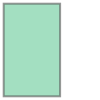

In [ ]:
#@title Rectangle

#@markdown |Lon|Lat|
#@markdown |:-:|:-:|
#@markdown |-75.25|6.85|
#@markdown |-75.92|6.85|
#@markdown |-75.92|5.75|
#@markdown |-75.25|5.75|

rectangle = Polygon(
    [[-75.25,6.85],
     [-75.92,6.85],
     [-75.92,5.75],
     [-75.25,5.75]]
     )
display(rectangle)

# https://gis.stackexchange.com/a/52708
# https://stackoverflow.com/a/61109050

# Define a polygon feature geometry with one attribute
schema = {
    'geometry': 'Polygon',
    'properties': {'Name': 'str'}
    }

# Write a new Shapefile
with fiona.open('MGN2020/my_rectangle.shp', 'w', 'ESRI Shapefile', schema) as c:
    ## If there are multiple geometries, put the "for" loop here
    c.write({
        'geometry': mapping(rectangle),
        'properties': {'Name': 'my_rectangle'}
        })

In [ ]:
#@title Read `.shp` files
%%time

Colombia_gdf = gpd.read_file('MGN2020/Colombia.shp')
display(Colombia_gdf)
Colombia_poly = Colombia_gdf['geometry'].values[0]
display(Colombia_poly)

my_rectangle_gpd = gpd.read_file('MGN2020/my_rectangle.shp')
display(my_rectangle_gpd)
my_rectangle = my_rectangle_gpd['geometry'].values[0]
display(my_rectangle)

Output hidden; open in https://colab.research.google.com to view.